In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data = pd.read_csv('my_movies.csv')

In [3]:
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
da = data.iloc[:,5:]

In [5]:
da.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [6]:
frequent_itemsets = apriori(da, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [7]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(Harry Potter1, Sixth Sense)","(LOTR1, Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [8]:
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
241,(LOTR1),"(Harry Potter1, Green Mile, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Harry Potter1),"(LOTR1, Green Mile, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(LOTR2),"(LOTR1, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(Green Mile),"(LOTR1, Harry Potter1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [9]:
rules2.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
196,"(Green Mile, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
151,"(LOTR1, Sixth Sense)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
105,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
182,"(Green Mile, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
207,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
225,"(LOTR1, LOTR2, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
155,"(Sixth Sense, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
154,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
224,"(LOTR1, Green Mile, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
223,"(LOTR1, Harry Potter1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [10]:
r = rules2[rules2.lift>1]
r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
241,(LOTR1),"(Harry Potter1, Green Mile, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Harry Potter1),"(LOTR1, Green Mile, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(LOTR2),"(LOTR1, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(Green Mile),"(LOTR1, Harry Potter1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [11]:
l = r.pivot('antecedents','consequents','lift')
l.head()

consequents,(Sixth Sense),"(Green Mile, LOTR2)","(LOTR, Green Mile)","(Braveheart, Patriot)","(Braveheart, Gladiator)","(LOTR1, LOTR2)",(Harry Potter1),"(Green Mile, Gladiator, Sixth Sense)","(LOTR, Gladiator, Sixth Sense)","(LOTR, Green Mile, Sixth Sense)","(LOTR, Green Mile, Gladiator)","(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense, LOTR2)","(LOTR1, Harry Potter1, LOTR2)","(LOTR1, Harry Potter1, Sixth Sense)",(Green Mile),"(LOTR1, Green Mile, Sixth Sense)","(Green Mile, Sixth Sense, LOTR2)","(LOTR1, Green Mile, LOTR2)","(LOTR1, Green Mile, LOTR2, Sixth Sense)","(Harry Potter1, Sixth Sense, LOTR2)","(LOTR1, Harry Potter1, LOTR2, Sixth Sense)","(Harry Potter1, Green Mile)","(Green Mile, Sixth Sense)","(LOTR1, Harry Potter1, Green Mile, Sixth Sense)",(Gladiator),(Patriot),(LOTR),"(LOTR1, Harry Potter1, Green Mile)",(Braveheart),"(Harry Potter1, Green Mile, Sixth Sense)",(LOTR1),"(LOTR1, Green Mile)",(Harry Potter2),(LOTR2),"(Gladiator, Patriot)","(Gladiator, Sixth Sense)","(LOTR, Sixth Sense)","(LOTR, Gladiator)","(Green Mile, Gladiator)","(Harry Potter1, Sixth Sense)","(LOTR1, Sixth Sense)","(Harry Potter1, Green Mile, LOTR2)","(Harry Potter1, Green Mile, LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)","(Patriot, Sixth Sense)","(LOTR1, Harry Potter1, Green Mile, LOTR2)"
antecedents,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(Gladiator),1.190476,NaN,1.428571,1.428571,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,1.428571,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN
"(Green Mile, LOTR2)",1.666667,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN,10.0,NaN,NaN,NaN
"(LOTR, Green Mile)",1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Gladiator)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
import seaborn as sns

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5]), <a list of 24 Text major ticklabel objects>)

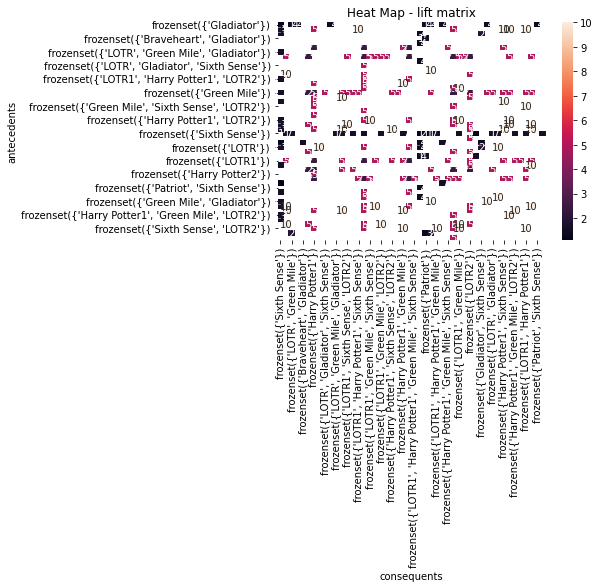

In [13]:
sns.heatmap(l,annot= True)
plt.title('Heat Map - lift matrix')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

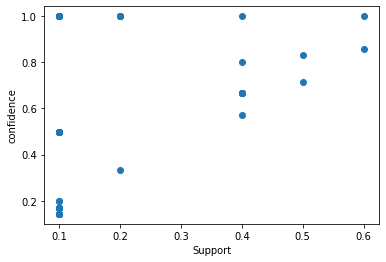

In [14]:
sup = r['support']
con = r['confidence']
plt.scatter(sup,con)
plt.xlabel('Support')
plt.ylabel('confidence')
plt.show()

In [25]:
frequent_itemsets1 = apriori(da, min_support=0.15, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [26]:
rules3 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.85)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [27]:
r1 = rules3[rules3.lift>1]
r1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [28]:
frequent_itemsets2 = apriori(da, min_support=0.2, use_colnames=True)

In [29]:
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [30]:
rules4 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.95)

In [31]:
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [32]:
r2 = rules4[rules4.lift>1]

In [33]:
r2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
